
MULTI-LAYER PERCEPTRON WITH BACKPROPAGATION
Complete Implementation with Weight Tracking

DEMONSTRATION: XOR PROBLEM

Dataset:
------------------------------
 X1  X2  Target
  0   0       0
  0   1       1
  1   0       1
  1   1       0
TRAINING MULTI-LAYER PERCEPTRON
Network Architecture: 2 -> 4 -> 1
Activation: sigmoid
Learning Rate: 0.5
Epochs: 5000

Epoch     0 | Loss: 0.25737393 | Accuracy: 50.00%

----------------------------------------------------------------------
Weight Details at Epoch 0:
----------------------------------------------------------------------

Layer 0 -> 1:
  Weights shape: (2, 4)
  Weights:
[[ 0.35002551 -0.09620954  0.45565052  1.07535751]
 [-0.16684116 -0.16406323  1.11522928  0.54037757]]
  Biases: [-0.00212178  0.00261824 -0.00219798 -0.00223196]
  Gradient magnitudes: min=0.002409, max=0.004669, mean=0.003294

Layer 1 -> 2:
  Weights shape: (4, 1)
  Weights:
[[-0.21452553]
 [ 0.28903065]
 [-0.20261657]
 [-0.2031153 ]]
  Biases: [0.03840829]
  Gradient

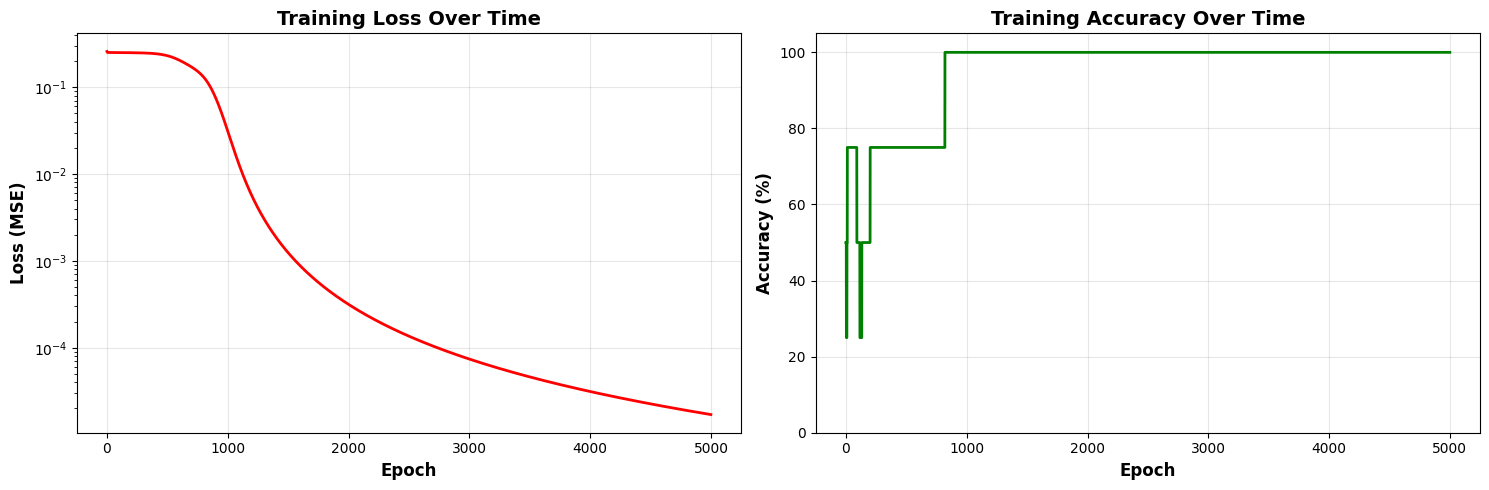

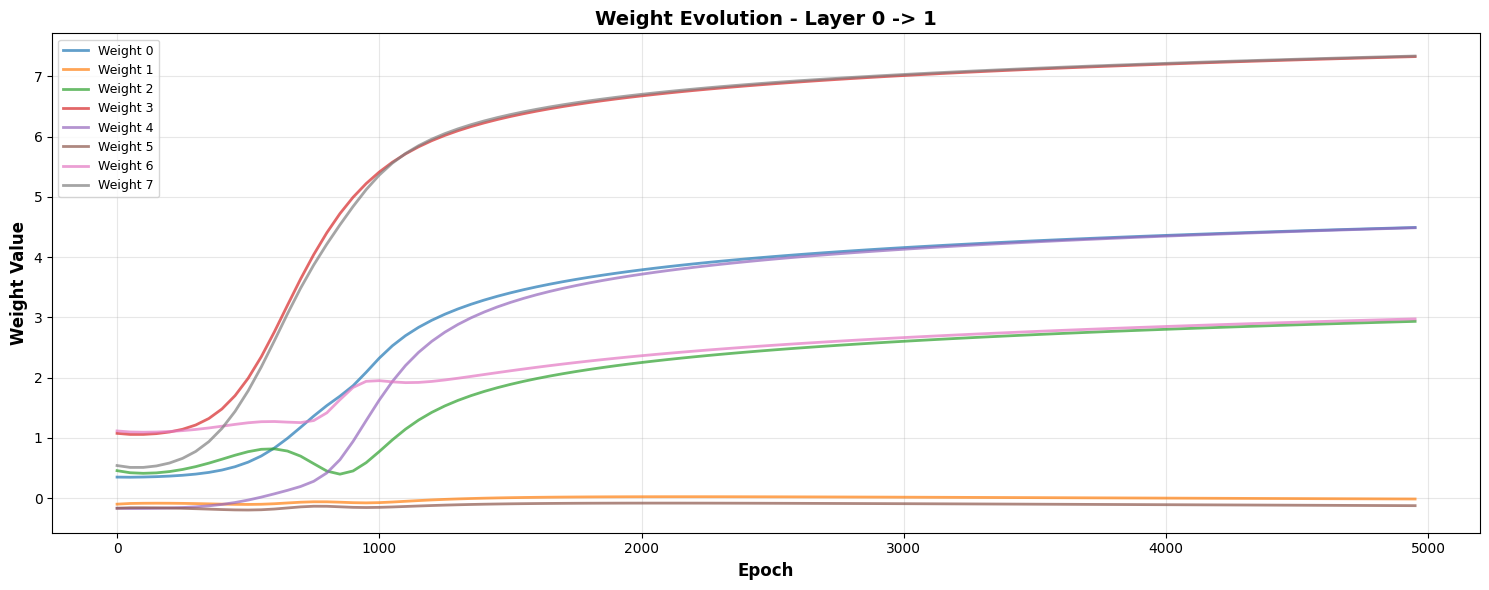

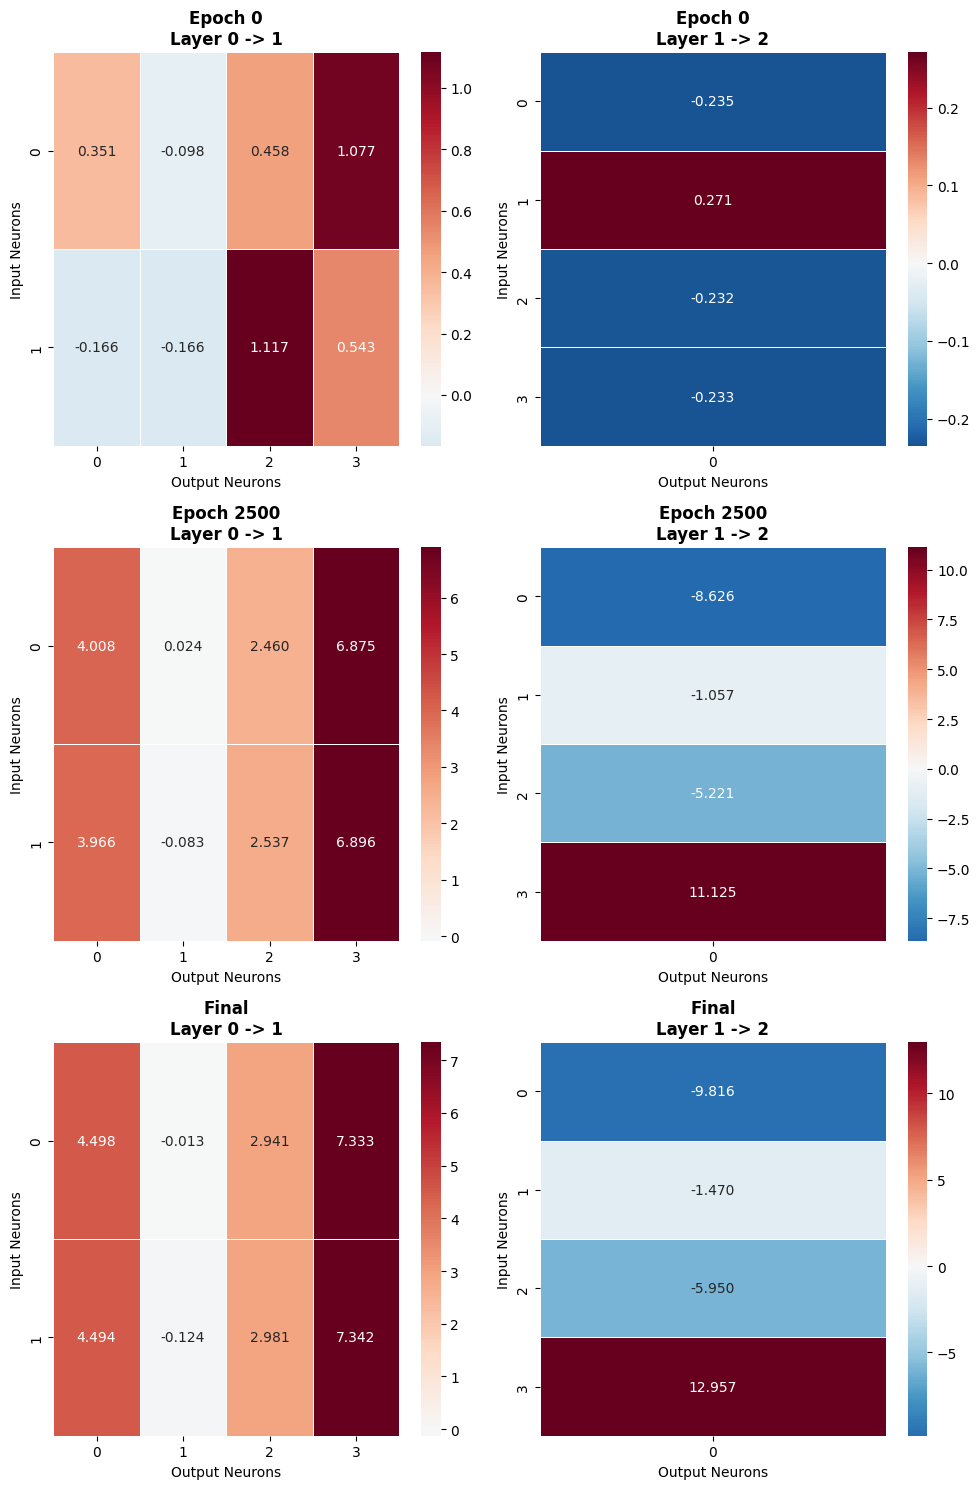

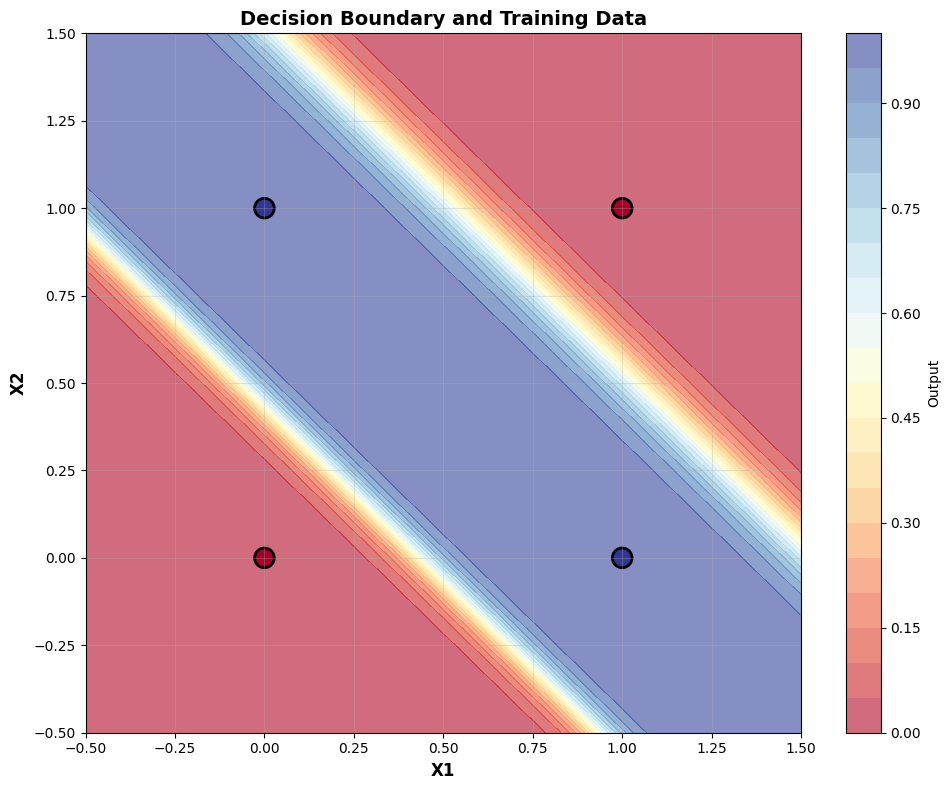


FINAL WEIGHT SUMMARY
 layer  shape       min       max      mean      std
0 -> 1 (2, 4) -0.123595  7.342089  3.681493 2.674541
1 -> 2 (4, 1) -9.816256 12.957010 -1.069804 8.620091

DEMONSTRATION: AND & OR GATES

AND Gate:
TRAINING MULTI-LAYER PERCEPTRON
Network Architecture: 2 -> 3 -> 1
Activation: sigmoid
Learning Rate: 0.5
Epochs: 2000

Epoch     0 | Loss: 0.22614988 | Accuracy: 75.00%

----------------------------------------------------------------------
Weight Details at Epoch 0:
----------------------------------------------------------------------

Layer 0 -> 1:
  Weights shape: (2, 3)
  Weights:
[[ 0.16970234 -1.35096466 -1.21690113]
 [-0.39822962 -0.71030746  0.22011112]]
  Biases: [ 0.01363797  0.02429521 -0.02180386]
  Gradient magnitudes: min=0.001265, max=0.011745, mean=0.004906

Layer 1 -> 2:
  Weights shape: (3, 1)
  Weights:
[[-0.57716696]
 [-0.86707554]
 [ 0.78945017]]
  Biases: [-0.10601731]
  Gradient magnitudes: min=0.103363, max=0.113485, mean=0.107562

Epoch     

In [1]:
"""
Multi-Layer Perceptron (MLP) with Detailed Backpropagation
Complete implementation showing weight changes step-by-step
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(42)

# ==================== ACTIVATION FUNCTIONS ====================

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    """Derivative of sigmoid (assumes x is already activated)"""
    return x * (1 - x)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU"""
    return (x > 0).astype(float)

def tanh(x):
    """Tanh activation function"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of tanh (assumes x is already activated)"""
    return 1 - x**2


# ==================== MULTI-LAYER PERCEPTRON CLASS ====================

class MultiLayerPerceptron:
    """
    Multi-Layer Perceptron Neural Network with detailed tracking
    """

    def __init__(self, layer_sizes, learning_rate=0.5, activation='sigmoid'):
        """
        Initialize MLP

        Parameters:
        layer_sizes: List of layer sizes [input, hidden1, hidden2, ..., output]
        learning_rate: Learning rate for gradient descent
        activation: Activation function ('sigmoid', 'relu', 'tanh')
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.learning_rate = learning_rate
        self.activation_name = activation

        # Set activation functions
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            # Xavier/He initialization
            if activation == 'relu':
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            else:
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(1.0 / layer_sizes[i])

            b = np.zeros((1, layer_sizes[i+1]))

            self.weights.append(w)
            self.biases.append(b)

        # Training history
        self.loss_history = []
        self.accuracy_history = []
        self.weight_history = []
        self.gradient_history = []

        # Current forward pass storage
        self.z_values = []  # Pre-activation values
        self.activations = []  # Post-activation values

    def forward_propagation(self, X):
        """
        Forward propagation through the network

        Parameters:
        X: Input data (m x n) where m is samples, n is features

        Returns:
        Final output of the network
        """
        self.z_values = []
        self.activations = [X]

        current_activation = X

        for i in range(len(self.weights)):
            # Linear transformation: Z = XW + b
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            self.z_values.append(z)

            # Apply activation function
            if i == len(self.weights) - 1:  # Output layer
                a = sigmoid(z)  # Always use sigmoid for output
            else:  # Hidden layers
                a = self.activation(z)

            self.activations.append(a)
            current_activation = a

        return self.activations[-1]

    def backward_propagation(self, X, y, output):
        """
        Backward propagation to compute gradients

        Parameters:
        X: Input data
        y: True labels
        output: Network output from forward pass

        Returns:
        List of weight gradients and bias gradients
        """
        m = X.shape[0]  # Number of samples

        weight_gradients = []
        bias_gradients = []

        # Output layer error (delta)
        delta = output - y

        # Backpropagate through layers (from output to input)
        for i in range(len(self.weights) - 1, -1, -1):
            # Compute gradients for current layer
            dW = np.dot(self.activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m

            weight_gradients.insert(0, dW)
            bias_gradients.insert(0, db)

            # Propagate error to previous layer (if not input layer)
            if i > 0:
                # Error for previous layer
                delta = np.dot(delta, self.weights[i].T)

                # Apply activation derivative
                if i == len(self.weights) - 1:
                    delta *= sigmoid_derivative(self.activations[i])
                else:
                    delta *= self.activation_derivative(self.activations[i])

        return weight_gradients, bias_gradients

    def update_weights(self, weight_gradients, bias_gradients):
        """
        Update weights and biases using gradient descent

        Parameters:
        weight_gradients: List of weight gradients
        bias_gradients: List of bias gradients
        """
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i]
            self.biases[i] -= self.learning_rate * bias_gradients[i]

    def compute_loss(self, y_true, y_pred):
        """Compute Mean Squared Error loss"""
        return np.mean((y_true - y_pred) ** 2)

    def compute_accuracy(self, y_true, y_pred, threshold=0.5):
        """Compute classification accuracy"""
        predictions = (y_pred > threshold).astype(int)
        return np.mean(predictions == y_true) * 100

    def train(self, X, y, epochs=10000, verbose=True, verbose_frequency=1000,
              save_history=True, save_frequency=100):
        """
        Train the neural network

        Parameters:
        X: Training data
        y: Training labels
        epochs: Number of training iterations
        verbose: Print training progress
        verbose_frequency: Print every N epochs
        save_history: Save weight history for visualization
        save_frequency: Save weights every N epochs
        """
        print("=" * 70)
        print(f"TRAINING MULTI-LAYER PERCEPTRON")
        print("=" * 70)
        print(f"Network Architecture: {' -> '.join(map(str, self.layer_sizes))}")
        print(f"Activation: {self.activation_name}")
        print(f"Learning Rate: {self.learning_rate}")
        print(f"Epochs: {epochs}")
        print("=" * 70)

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Compute loss and accuracy
            loss = self.compute_loss(y, output)
            accuracy = self.compute_accuracy(y, output)

            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            # Backward propagation
            weight_gradients, bias_gradients = self.backward_propagation(X, y, output)

            # Save weight snapshot
            if save_history and epoch % save_frequency == 0:
                self.weight_history.append({
                    'epoch': epoch,
                    'weights': [w.copy() for w in self.weights],
                    'biases': [b.copy() for b in self.biases],
                    'gradients': [wg.copy() for wg in weight_gradients]
                })

            # Update weights
            self.update_weights(weight_gradients, bias_gradients)

            # Print progress
            if verbose and (epoch % verbose_frequency == 0 or epoch < 10):
                print(f"\nEpoch {epoch:5d} | Loss: {loss:.8f} | Accuracy: {accuracy:.2f}%")

                if epoch < 10 or epoch % (verbose_frequency * 5) == 0:
                    self.print_weight_changes(epoch, weight_gradients)

        # Final results
        print("\n" + "=" * 70)
        print("TRAINING COMPLETE")
        print("=" * 70)
        final_output = self.forward_propagation(X)
        final_loss = self.compute_loss(y, final_output)
        final_accuracy = self.compute_accuracy(y, final_output)
        print(f"Final Loss: {final_loss:.8f}")
        print(f"Final Accuracy: {final_accuracy:.2f}%")
        print("=" * 70)

    def print_weight_changes(self, epoch, gradients):
        """Print detailed weight information"""
        print("\n" + "-" * 70)
        print(f"Weight Details at Epoch {epoch}:")
        print("-" * 70)

        for i in range(len(self.weights)):
            print(f"\nLayer {i} -> {i+1}:")
            print(f"  Weights shape: {self.weights[i].shape}")
            print(f"  Weights:\n{self.weights[i]}")
            print(f"  Biases: {self.biases[i].flatten()}")
            print(f"  Gradient magnitudes: min={np.min(np.abs(gradients[i])):.6f}, "
                  f"max={np.max(np.abs(gradients[i])):.6f}, "
                  f"mean={np.mean(np.abs(gradients[i])):.6f}")

    def predict(self, X):
        """Make predictions on new data"""
        return self.forward_propagation(X)

    def get_weight_summary(self):
        """Get summary statistics of all weights"""
        summary = []
        for i, w in enumerate(self.weights):
            summary.append({
                'layer': f'{i} -> {i+1}',
                'shape': w.shape,
                'min': np.min(w),
                'max': np.max(w),
                'mean': np.mean(w),
                'std': np.std(w)
            })
        return pd.DataFrame(summary)


# ==================== VISUALIZATION FUNCTIONS ====================

def visualize_training_history(mlp):
    """Visualize loss and accuracy over epochs"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    axes[0].plot(mlp.loss_history, linewidth=2, color='red')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
    axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_yscale('log')

    # Accuracy plot
    axes[1].plot(mlp.accuracy_history, linewidth=2, color='green')
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 105])

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_weight_evolution(mlp, layer_idx=0):
    """Visualize how weights change during training"""
    if not mlp.weight_history:
        print("No weight history saved!")
        return

    epochs = [h['epoch'] for h in mlp.weight_history]
    weights = [h['weights'][layer_idx] for h in mlp.weight_history]

    # Flatten weights for plotting
    num_weights = weights[0].size
    weight_evolution = np.array([w.flatten() for w in weights])

    plt.figure(figsize=(15, 6))

    for i in range(min(num_weights, 10)):  # Plot first 10 weights
        plt.plot(epochs, weight_evolution[:, i], label=f'Weight {i}', linewidth=2, alpha=0.7)

    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Weight Value', fontsize=12, fontweight='bold')
    plt.title(f'Weight Evolution - Layer {layer_idx} -> {layer_idx+1}',
              fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'weight_evolution_layer_{layer_idx}.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_weight_heatmaps(mlp, epoch_indices=[0, -1]):
    """Visualize weight matrices as heatmaps"""
    num_layers = len(mlp.weights)
    fig, axes = plt.subplots(len(epoch_indices), num_layers,
                            figsize=(5*num_layers, 5*len(epoch_indices)))

    if len(epoch_indices) == 1:
        axes = axes.reshape(1, -1)

    for row, epoch_idx in enumerate(epoch_indices):
        if epoch_idx == -1:
            weights_to_plot = mlp.weights
            epoch_label = "Final"
        else:
            weights_to_plot = mlp.weight_history[epoch_idx]['weights']
            epoch_label = f"Epoch {mlp.weight_history[epoch_idx]['epoch']}"

        for col, w in enumerate(weights_to_plot):
            ax = axes[row, col] if num_layers > 1 else axes[row]

            sns.heatmap(w, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                       cbar=True, ax=ax, linewidths=0.5)
            ax.set_title(f'{epoch_label}\nLayer {col} -> {col+1}',
                        fontweight='bold')
            ax.set_xlabel('Output Neurons')
            ax.set_ylabel('Input Neurons')

    plt.tight_layout()
    plt.savefig('weight_heatmaps.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_decision_boundary(mlp, X, y):
    """Visualize decision boundary for 2D input"""
    if X.shape[1] != 2:
        print("Decision boundary visualization only works for 2D input!")
        return

    # Create mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on mesh
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(label='Output')

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.flatten(),
                         cmap='RdYlBu', s=200, edgecolors='black',
                         linewidth=2, marker='o')

    plt.xlabel('X1', fontsize=12, fontweight='bold')
    plt.ylabel('X2', fontsize=12, fontweight='bold')
    plt.title('Decision Boundary and Training Data', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('decision_boundary.png', dpi=150, bbox_inches='tight')
    plt.show()


# ==================== DEMONSTRATION WITH XOR PROBLEM ====================

def demonstrate_xor_problem():
    """Demonstrate MLP learning XOR function"""
    print("\n" + "=" * 70)
    print("DEMONSTRATION: XOR PROBLEM")
    print("=" * 70)

    # XOR dataset
    X_xor = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])

    y_xor = np.array([[0],
                      [1],
                      [1],
                      [0]])

    print("\nDataset:")
    print("-" * 30)
    df = pd.DataFrame(X_xor, columns=['X1', 'X2'])
    df['Target'] = y_xor.flatten()
    print(df.to_string(index=False))

    # Create and train MLP
    mlp = MultiLayerPerceptron(
        layer_sizes=[2, 4, 1],  # 2 inputs, 4 hidden, 1 output
        learning_rate=0.5,
        activation='sigmoid'
    )

    mlp.train(X_xor, y_xor, epochs=5000, verbose=True,
              verbose_frequency=500, save_frequency=50)

    # Print final predictions
    print("\n" + "=" * 70)
    print("FINAL PREDICTIONS")
    print("=" * 70)
    predictions = mlp.predict(X_xor)

    df['Prediction'] = predictions.flatten()
    df['Rounded'] = (predictions > 0.5).astype(int).flatten()
    print(df.to_string(index=False))

    # Visualizations
    print("\nGenerating visualizations...")
    visualize_training_history(mlp)
    visualize_weight_evolution(mlp, layer_idx=0)
    visualize_weight_heatmaps(mlp, epoch_indices=[0, len(mlp.weight_history)//2, -1])
    visualize_decision_boundary(mlp, X_xor, y_xor)

    # Weight summary
    print("\n" + "=" * 70)
    print("FINAL WEIGHT SUMMARY")
    print("=" * 70)
    print(mlp.get_weight_summary().to_string(index=False))

    return mlp


# ==================== DEMONSTRATION WITH AND/OR GATES ====================

def demonstrate_logic_gates():
    """Demonstrate MLP learning multiple logic gates"""
    print("\n" + "=" * 70)
    print("DEMONSTRATION: AND & OR GATES")
    print("=" * 70)

    # Combined dataset
    X_logic = np.array([[0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

    # AND and OR as two outputs
    y_and = np.array([[0], [0], [0], [1]])
    y_or = np.array([[0], [1], [1], [1]])

    print("\nAND Gate:")
    mlp_and = MultiLayerPerceptron([2, 3, 1], learning_rate=0.5)
    mlp_and.train(X_logic, y_and, epochs=2000, verbose=True, verbose_frequency=500)

    print("\n\nOR Gate:")
    mlp_or = MultiLayerPerceptron([2, 3, 1], learning_rate=0.5)
    mlp_or.train(X_logic, y_or, epochs=2000, verbose=True, verbose_frequency=500)

    return mlp_and, mlp_or


# ==================== MAIN EXECUTION ====================

if __name__ == "__main__":
    print("\n" + "=" * 70)
    print("MULTI-LAYER PERCEPTRON WITH BACKPROPAGATION")
    print("Complete Implementation with Weight Tracking")
    print("=" * 70)

    # Demonstrate XOR problem
    mlp_xor = demonstrate_xor_problem()

    # Demonstrate AND/OR gates
    mlp_and, mlp_or = demonstrate_logic_gates()

    print("\n" + "=" * 70)
    print("ALL DEMONSTRATIONS COMPLETE!")
    print("=" * 70)
    print("\nGenerated files:")
    print("  - training_history.png")
    print("  - weight_evolution_layer_0.png")
    print("  - weight_heatmaps.png")
    print("  - decision_boundary.png")
    print("=" * 70)


MULTI-LAYER PERCEPTRON WITH BACKPROPAGATION
Complete Implementation with Weight Tracking & Preprocessing

DEMONSTRATION: XOR PROBLEM (WITHOUT PREPROCESSING)

Dataset:
------------------------------
 X1  X2  Target
  0   0       0
  0   1       1
  1   0       1
  1   1       0

TRAINING MULTI-LAYER PERCEPTRON
Network Architecture: 2 -> 4 -> 1
Activation: sigmoid
Learning Rate: 0.5
Preprocessing: None
Epochs: 5000

Epoch     0 | Loss: 0.25737393 | Accuracy: 50.00%

----------------------------------------------------------------------
Weight Details at Epoch 0:
----------------------------------------------------------------------

Layer 0 -> 1:
  Weights shape: (2, 4)
  Weights:
[[ 0.35002551 -0.09620954  0.45565052  1.07535751]
 [-0.16684116 -0.16406323  1.11522928  0.54037757]]
  Biases: [-0.00212178  0.00261824 -0.00219798 -0.00223196]
  Gradient magnitudes: min=0.002409, max=0.004669, mean=0.003294

Layer 1 -> 2:
  Weights shape: (4, 1)
  Weights:
[[-0.21452553]
 [ 0.28903065]
 [-

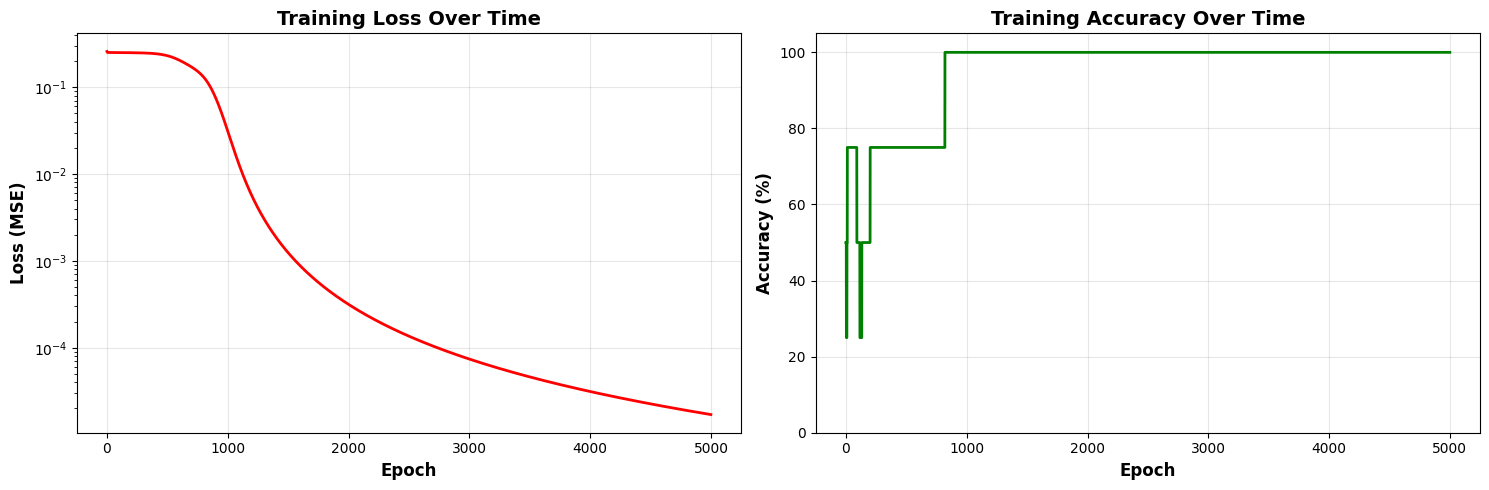

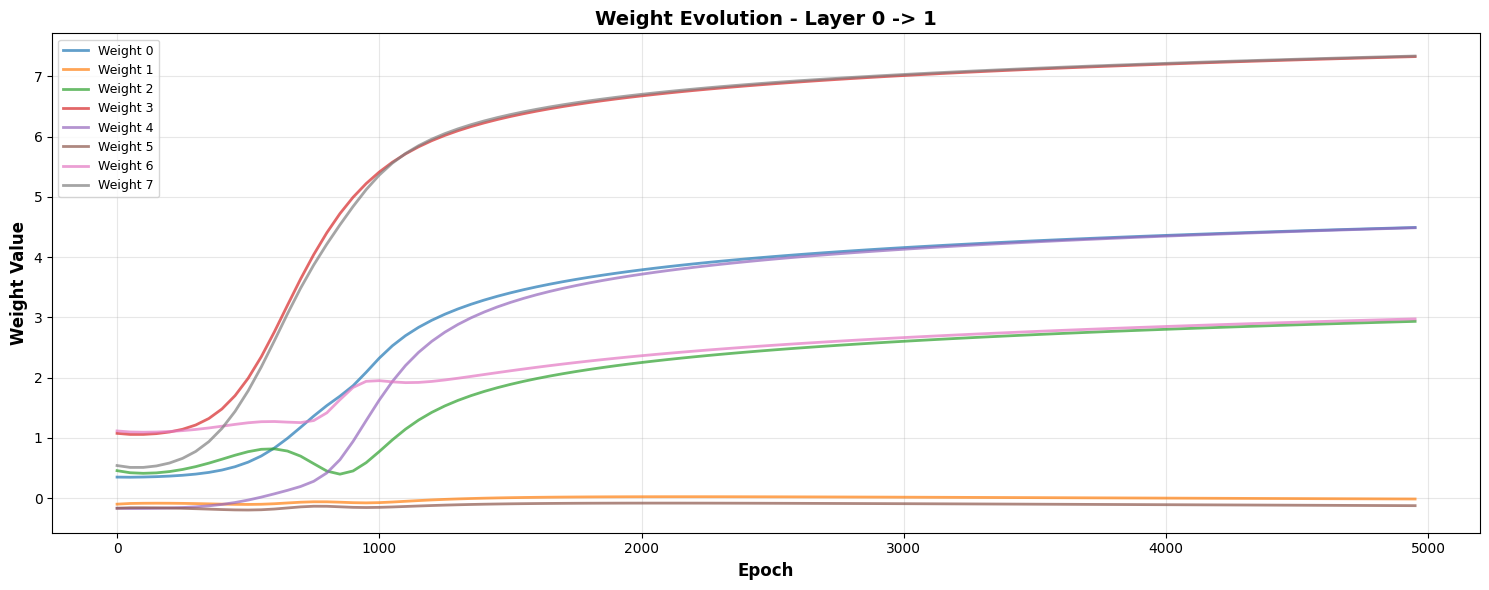

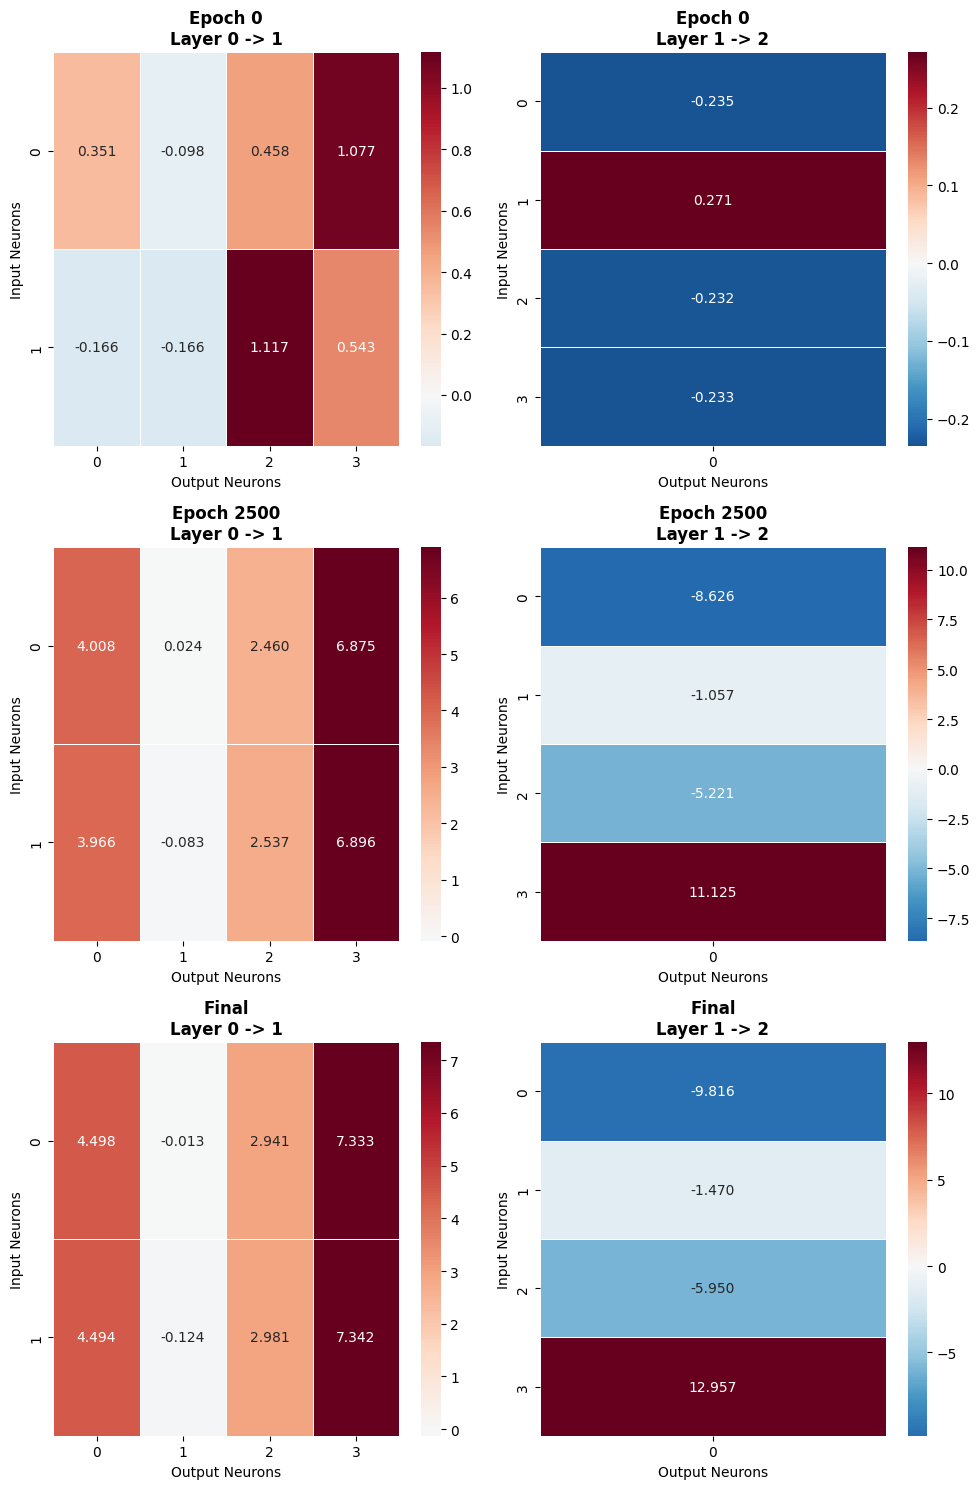

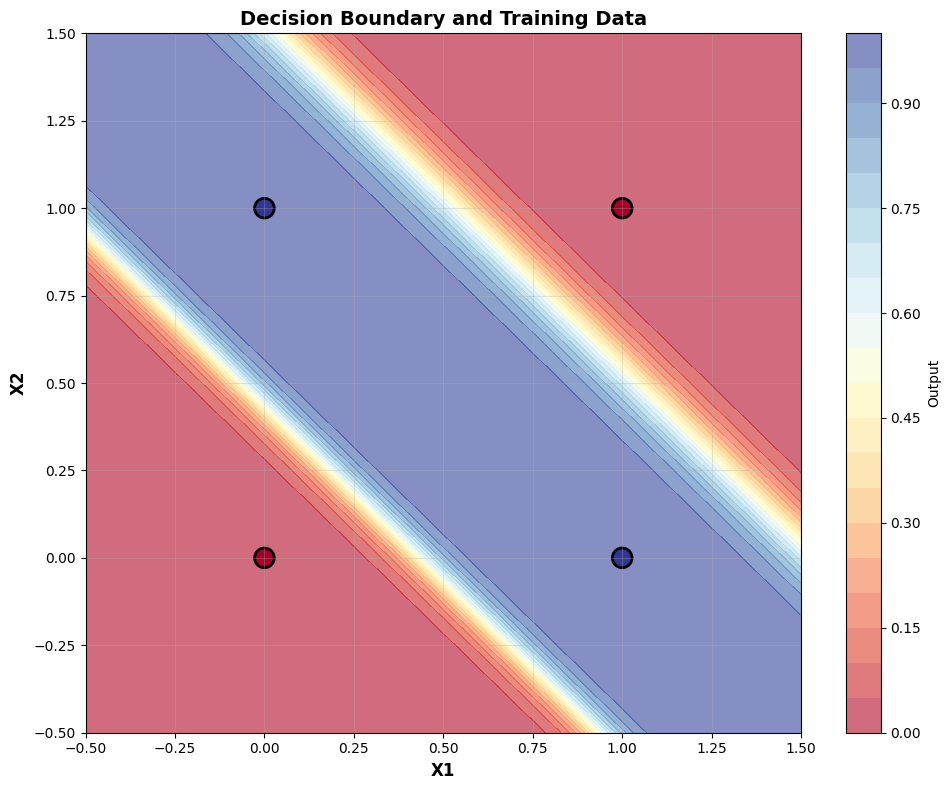


FINAL WEIGHT SUMMARY
 layer  shape       min       max      mean      std
0 -> 1 (2, 4) -0.123595  7.342089  3.681493 2.674541
1 -> 2 (4, 1) -9.816256 12.957010 -1.069804 8.620091

DEMONSTRATION: SCALED DATA WITH PREPROCESSING

Original Dataset:
--------------------------------------------------
 Feature1  Feature2  Target
       10       200       0
       15       180       0
       20       220       0
       25       190       1
       30       210       1
       35       195       1

Training WITHOUT Preprocessing:

TRAINING MULTI-LAYER PERCEPTRON
Network Architecture: 2 -> 4 -> 1
Activation: sigmoid
Learning Rate: 0.01
Preprocessing: None
Epochs: 2000

Epoch     0 | Loss: 0.24603410 | Accuracy: 50.00%

----------------------------------------------------------------------
Weight Details at Epoch 0:
----------------------------------------------------------------------

Layer 0 -> 1:
  Weights shape: (2, 4)
  Weights:
[[ 0.17109316 -1.35295785 -1.2197011  -0.39759732]
 [-0.716179

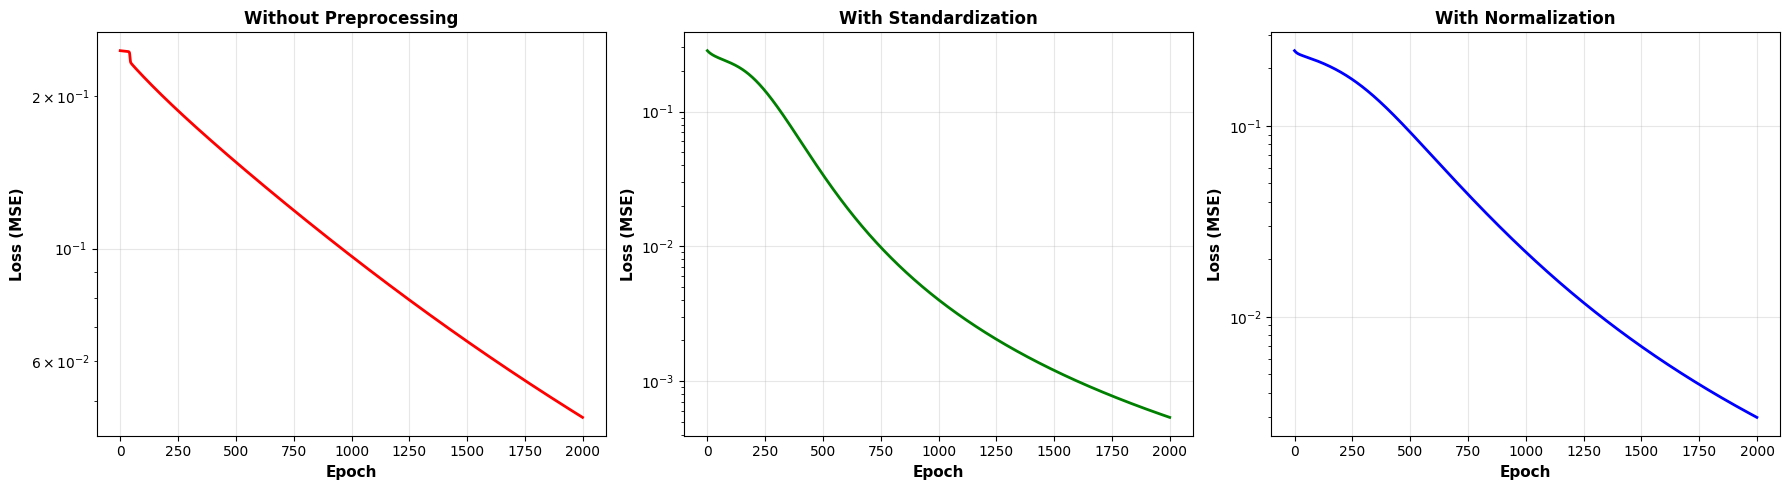


DEMONSTRATION: AND & OR GATES

AND Gate:

TRAINING MULTI-LAYER PERCEPTRON
Network Architecture: 2 -> 3 -> 1
Activation: sigmoid
Learning Rate: 0.5
Preprocessing: None
Epochs: 2000

Epoch     0 | Loss: 0.29128720 | Accuracy: 25.00%

----------------------------------------------------------------------
Weight Details at Epoch 0:
----------------------------------------------------------------------

Layer 0 -> 1:
  Weights shape: (2, 3)
  Weights:
[[ 0.24201369 -1.24882546  0.23070651]
 [-0.27315197 -0.48306978  0.43374557]]
  Biases: [-0.02165752 -0.02052671  0.01816909]
  Gradient magnitudes: min=0.001715, max=0.008827, mean=0.003723

Layer 1 -> 2:
  Weights shape: (3, 1)
  Weights:
[[ 0.52138312]
 [ 0.46943072]
 [-0.55980772]]
  Biases: [-0.14776113]
  Gradient magnitudes: min=0.136488, max=0.150571, mean=0.144929

Epoch     1 | Loss: 0.25682079 | Accuracy: 50.00%

----------------------------------------------------------------------
Weight Details at Epoch 1:
---------------------

In [2]:
"""
Multi-Layer Perceptron (MLP) with Detailed Backpropagation
Complete implementation showing weight changes step-by-step
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set random seed for reproducibility
np.random.seed(42)

# ==================== DATA PREPROCESSING ====================

class DataPreprocessor:
    """
    Data preprocessing utilities for neural networks
    Includes standardization, normalization, and other transformations
    """

    def __init__(self):
        self.mean = None
        self.std = None
        self.min = None
        self.max = None
        self.fitted = False

    def standardize_fit(self, X):
        """
        Fit standardization parameters (z-score normalization)
        Formula: X_scaled = (X - mean) / std

        Parameters:
        X: Training data
        """
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        # Avoid division by zero
        self.std[self.std == 0] = 1
        self.fitted = True

        print("Standardization Parameters:")
        print(f"  Mean: {self.mean}")
        print(f"  Std:  {self.std}")

        return self

    def standardize_transform(self, X):
        """
        Apply standardization to data

        Parameters:
        X: Data to transform

        Returns:
        Standardized data
        """
        if not self.fitted:
            raise ValueError("Preprocessor not fitted! Call standardize_fit() first.")

        return (X - self.mean) / self.std

    def standardize_fit_transform(self, X):
        """Fit and transform in one step"""
        self.standardize_fit(X)
        return self.standardize_transform(X)

    def standardize_inverse(self, X_scaled):
        """
        Inverse standardization transformation

        Parameters:
        X_scaled: Standardized data

        Returns:
        Original scale data
        """
        if not self.fitted:
            raise ValueError("Preprocessor not fitted!")

        return (X_scaled * self.std) + self.mean

    def normalize_fit(self, X):
        """
        Fit min-max normalization parameters
        Formula: X_scaled = (X - min) / (max - min)
        Scales data to [0, 1] range

        Parameters:
        X: Training data
        """
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)
        # Avoid division by zero
        range_vals = self.max - self.min
        range_vals[range_vals == 0] = 1
        self.range = range_vals
        self.fitted = True

        print("Normalization Parameters:")
        print(f"  Min: {self.min}")
        print(f"  Max: {self.max}")

        return self

    def normalize_transform(self, X):
        """
        Apply min-max normalization

        Parameters:
        X: Data to transform

        Returns:
        Normalized data in [0, 1] range
        """
        if not self.fitted:
            raise ValueError("Preprocessor not fitted! Call normalize_fit() first.")

        return (X - self.min) / self.range

    def normalize_fit_transform(self, X):
        """Fit and transform in one step"""
        self.normalize_fit(X)
        return self.normalize_transform(X)

    def normalize_inverse(self, X_scaled):
        """
        Inverse normalization transformation

        Parameters:
        X_scaled: Normalized data

        Returns:
        Original scale data
        """
        if not self.fitted:
            raise ValueError("Preprocessor not fitted!")

        return (X_scaled * self.range) + self.min


# ==================== ACTIVATION FUNCTIONS ====================

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    """Derivative of sigmoid (assumes x is already activated)"""
    return x * (1 - x)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU"""
    return (x > 0).astype(float)

def tanh(x):
    """Tanh activation function"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of tanh (assumes x is already activated)"""
    return 1 - x**2


# ==================== MULTI-LAYER PERCEPTRON CLASS ====================

class MultiLayerPerceptron:
    """
    Multi-Layer Perceptron Neural Network with detailed tracking
    """

    def __init__(self, layer_sizes, learning_rate=0.5, activation='sigmoid',
                 use_preprocessing=False, preprocessing_type='standardize'):
        """
        Initialize MLP

        Parameters:
        layer_sizes: List of layer sizes [input, hidden1, hidden2, ..., output]
        learning_rate: Learning rate for gradient descent
        activation: Activation function ('sigmoid', 'relu', 'tanh')
        use_preprocessing: Whether to apply data preprocessing
        preprocessing_type: Type of preprocessing ('standardize' or 'normalize')
        """
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.learning_rate = learning_rate
        self.activation_name = activation
        self.use_preprocessing = use_preprocessing
        self.preprocessing_type = preprocessing_type

        # Initialize preprocessor
        if use_preprocessing:
            self.preprocessor = DataPreprocessor()
        else:
            self.preprocessor = None

        # Set activation functions
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.num_layers - 1):
            # Xavier/He initialization
            if activation == 'relu':
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2.0 / layer_sizes[i])
            else:
                w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(1.0 / layer_sizes[i])

            b = np.zeros((1, layer_sizes[i+1]))

            self.weights.append(w)
            self.biases.append(b)

        # Training history
        self.loss_history = []
        self.accuracy_history = []
        self.weight_history = []
        self.gradient_history = []

        # Current forward pass storage
        self.z_values = []  # Pre-activation values
        self.activations = []  # Post-activation values

    def forward_propagation(self, X):
        """
        Forward propagation through the network

        Parameters:
        X: Input data (m x n) where m is samples, n is features

        Returns:
        Final output of the network
        """
        self.z_values = []
        self.activations = [X]

        current_activation = X

        for i in range(len(self.weights)):
            # Linear transformation: Z = XW + b
            z = np.dot(current_activation, self.weights[i]) + self.biases[i]
            self.z_values.append(z)

            # Apply activation function
            if i == len(self.weights) - 1:  # Output layer
                a = sigmoid(z)  # Always use sigmoid for output
            else:  # Hidden layers
                a = self.activation(z)

            self.activations.append(a)
            current_activation = a

        return self.activations[-1]

    def backward_propagation(self, X, y, output):
        """
        Backward propagation to compute gradients

        Parameters:
        X: Input data
        y: True labels
        output: Network output from forward pass

        Returns:
        List of weight gradients and bias gradients
        """
        m = X.shape[0]  # Number of samples

        weight_gradients = []
        bias_gradients = []

        # Output layer error (delta)
        delta = output - y

        # Backpropagate through layers (from output to input)
        for i in range(len(self.weights) - 1, -1, -1):
            # Compute gradients for current layer
            dW = np.dot(self.activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m

            weight_gradients.insert(0, dW)
            bias_gradients.insert(0, db)

            # Propagate error to previous layer (if not input layer)
            if i > 0:
                # Error for previous layer
                delta = np.dot(delta, self.weights[i].T)

                # Apply activation derivative
                if i == len(self.weights) - 1:
                    delta *= sigmoid_derivative(self.activations[i])
                else:
                    delta *= self.activation_derivative(self.activations[i])

        return weight_gradients, bias_gradients

    def update_weights(self, weight_gradients, bias_gradients):
        """
        Update weights and biases using gradient descent

        Parameters:
        weight_gradients: List of weight gradients
        bias_gradients: List of bias gradients
        """
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i]
            self.biases[i] -= self.learning_rate * bias_gradients[i]

    def compute_loss(self, y_true, y_pred):
        """Compute Mean Squared Error loss"""
        return np.mean((y_true - y_pred) ** 2)

    def compute_accuracy(self, y_true, y_pred, threshold=0.5):
        """Compute classification accuracy"""
        predictions = (y_pred > threshold).astype(int)
        return np.mean(predictions == y_true) * 100

    def train(self, X, y, epochs=10000, verbose=True, verbose_frequency=1000,
              save_history=True, save_frequency=100):
        """
        Train the neural network

        Parameters:
        X: Training data
        y: Training labels
        epochs: Number of training iterations
        verbose: Print training progress
        verbose_frequency: Print every N epochs
        save_history: Save weight history for visualization
        save_frequency: Save weights every N epochs
        """
        # Preprocess data if enabled
        if self.use_preprocessing:
            print("\n" + "=" * 70)
            print("DATA PREPROCESSING")
            print("=" * 70)
            print(f"Type: {self.preprocessing_type}")
            print(f"\nOriginal data statistics:")
            print(f"  Mean: {np.mean(X, axis=0)}")
            print(f"  Std:  {np.std(X, axis=0)}")
            print(f"  Min:  {np.min(X, axis=0)}")
            print(f"  Max:  {np.max(X, axis=0)}")

            if self.preprocessing_type == 'standardize':
                X = self.preprocessor.standardize_fit_transform(X)
            else:  # normalize
                X = self.preprocessor.normalize_fit_transform(X)

            print(f"\nPreprocessed data statistics:")
            print(f"  Mean: {np.mean(X, axis=0)}")
            print(f"  Std:  {np.std(X, axis=0)}")
            print(f"  Min:  {np.min(X, axis=0)}")
            print(f"  Max:  {np.max(X, axis=0)}")

        print("\n" + "=" * 70)
        print(f"TRAINING MULTI-LAYER PERCEPTRON")
        print("=" * 70)
        print(f"Network Architecture: {' -> '.join(map(str, self.layer_sizes))}")
        print(f"Activation: {self.activation_name}")
        print(f"Learning Rate: {self.learning_rate}")
        print(f"Preprocessing: {self.preprocessing_type if self.use_preprocessing else 'None'}")
        print(f"Epochs: {epochs}")
        print("=" * 70)

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Compute loss and accuracy
            loss = self.compute_loss(y, output)
            accuracy = self.compute_accuracy(y, output)

            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            # Backward propagation
            weight_gradients, bias_gradients = self.backward_propagation(X, y, output)

            # Save weight snapshot
            if save_history and epoch % save_frequency == 0:
                self.weight_history.append({
                    'epoch': epoch,
                    'weights': [w.copy() for w in self.weights],
                    'biases': [b.copy() for b in self.biases],
                    'gradients': [wg.copy() for wg in weight_gradients]
                })

            # Update weights
            self.update_weights(weight_gradients, bias_gradients)

            # Print progress
            if verbose and (epoch % verbose_frequency == 0 or epoch < 10):
                print(f"\nEpoch {epoch:5d} | Loss: {loss:.8f} | Accuracy: {accuracy:.2f}%")

                if epoch < 10 or epoch % (verbose_frequency * 5) == 0:
                    self.print_weight_changes(epoch, weight_gradients)

        # Final results
        print("\n" + "=" * 70)
        print("TRAINING COMPLETE")
        print("=" * 70)
        final_output = self.forward_propagation(X)
        final_loss = self.compute_loss(y, final_output)
        final_accuracy = self.compute_accuracy(y, final_output)
        print(f"Final Loss: {final_loss:.8f}")
        print(f"Final Accuracy: {final_accuracy:.2f}%")
        print("=" * 70)

    def print_weight_changes(self, epoch, gradients):
        """Print detailed weight information"""
        print("\n" + "-" * 70)
        print(f"Weight Details at Epoch {epoch}:")
        print("-" * 70)

        for i in range(len(self.weights)):
            print(f"\nLayer {i} -> {i+1}:")
            print(f"  Weights shape: {self.weights[i].shape}")
            print(f"  Weights:\n{self.weights[i]}")
            print(f"  Biases: {self.biases[i].flatten()}")
            print(f"  Gradient magnitudes: min={np.min(np.abs(gradients[i])):.6f}, "
                  f"max={np.max(np.abs(gradients[i])):.6f}, "
                  f"mean={np.mean(np.abs(gradients[i])):.6f}")

    def predict(self, X):
        """Make predictions on new data"""
        # Preprocess if needed
        if self.use_preprocessing:
            if self.preprocessing_type == 'standardize':
                X = self.preprocessor.standardize_transform(X)
            else:
                X = self.preprocessor.normalize_transform(X)

        return self.forward_propagation(X)

    def get_weight_summary(self):
        """Get summary statistics of all weights"""
        summary = []
        for i, w in enumerate(self.weights):
            summary.append({
                'layer': f'{i} -> {i+1}',
                'shape': w.shape,
                'min': np.min(w),
                'max': np.max(w),
                'mean': np.mean(w),
                'std': np.std(w)
            })
        return pd.DataFrame(summary)


# ==================== VISUALIZATION FUNCTIONS ====================

def visualize_training_history(mlp):
    """Visualize loss and accuracy over epochs"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    axes[0].plot(mlp.loss_history, linewidth=2, color='red')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
    axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_yscale('log')

    # Accuracy plot
    axes[1].plot(mlp.accuracy_history, linewidth=2, color='green')
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 105])

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_weight_evolution(mlp, layer_idx=0):
    """Visualize how weights change during training"""
    if not mlp.weight_history:
        print("No weight history saved!")
        return

    epochs = [h['epoch'] for h in mlp.weight_history]
    weights = [h['weights'][layer_idx] for h in mlp.weight_history]

    # Flatten weights for plotting
    num_weights = weights[0].size
    weight_evolution = np.array([w.flatten() for w in weights])

    plt.figure(figsize=(15, 6))

    for i in range(min(num_weights, 10)):  # Plot first 10 weights
        plt.plot(epochs, weight_evolution[:, i], label=f'Weight {i}', linewidth=2, alpha=0.7)

    plt.xlabel('Epoch', fontsize=12, fontweight='bold')
    plt.ylabel('Weight Value', fontsize=12, fontweight='bold')
    plt.title(f'Weight Evolution - Layer {layer_idx} -> {layer_idx+1}',
              fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'weight_evolution_layer_{layer_idx}.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_weight_heatmaps(mlp, epoch_indices=[0, -1]):
    """Visualize weight matrices as heatmaps"""
    num_layers = len(mlp.weights)
    fig, axes = plt.subplots(len(epoch_indices), num_layers,
                            figsize=(5*num_layers, 5*len(epoch_indices)))

    if len(epoch_indices) == 1:
        axes = axes.reshape(1, -1)

    for row, epoch_idx in enumerate(epoch_indices):
        if epoch_idx == -1:
            weights_to_plot = mlp.weights
            epoch_label = "Final"
        else:
            weights_to_plot = mlp.weight_history[epoch_idx]['weights']
            epoch_label = f"Epoch {mlp.weight_history[epoch_idx]['epoch']}"

        for col, w in enumerate(weights_to_plot):
            ax = axes[row, col] if num_layers > 1 else axes[row]

            sns.heatmap(w, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                       cbar=True, ax=ax, linewidths=0.5)
            ax.set_title(f'{epoch_label}\nLayer {col} -> {col+1}',
                        fontweight='bold')
            ax.set_xlabel('Output Neurons')
            ax.set_ylabel('Input Neurons')

    plt.tight_layout()
    plt.savefig('weight_heatmaps.png', dpi=150, bbox_inches='tight')
    plt.show()


def visualize_decision_boundary(mlp, X, y):
    """Visualize decision boundary for 2D input"""
    if X.shape[1] != 2:
        print("Decision boundary visualization only works for 2D input!")
        return

    # Create mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on mesh
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu', alpha=0.6)
    plt.colorbar(label='Output')

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y.flatten(),
                         cmap='RdYlBu', s=200, edgecolors='black',
                         linewidth=2, marker='o')

    plt.xlabel('X1', fontsize=12, fontweight='bold')
    plt.ylabel('X2', fontsize=12, fontweight='bold')
    plt.title('Decision Boundary and Training Data', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('decision_boundary.png', dpi=150, bbox_inches='tight')
    plt.show()


# ==================== DEMONSTRATION WITH XOR PROBLEM ====================

def demonstrate_xor_problem():
    """Demonstrate MLP learning XOR function"""
    print("\n" + "=" * 70)
    print("DEMONSTRATION: XOR PROBLEM (WITHOUT PREPROCESSING)")
    print("=" * 70)

    # XOR dataset
    X_xor = np.array([[0, 0],
                      [0, 1],
                      [1, 0],
                      [1, 1]])

    y_xor = np.array([[0],
                      [1],
                      [1],
                      [0]])

    print("\nDataset:")
    print("-" * 30)
    df = pd.DataFrame(X_xor, columns=['X1', 'X2'])
    df['Target'] = y_xor.flatten()
    print(df.to_string(index=False))

    # Create and train MLP
    mlp = MultiLayerPerceptron(
        layer_sizes=[2, 4, 1],  # 2 inputs, 4 hidden, 1 output
        learning_rate=0.5,
        activation='sigmoid',
        use_preprocessing=False
    )

    mlp.train(X_xor, y_xor, epochs=5000, verbose=True,
              verbose_frequency=500, save_frequency=50)

    # Print final predictions
    print("\n" + "=" * 70)
    print("FINAL PREDICTIONS")
    print("=" * 70)
    predictions = mlp.predict(X_xor)

    df['Prediction'] = predictions.flatten()
    df['Rounded'] = (predictions > 0.5).astype(int).flatten()
    print(df.to_string(index=False))

    # Visualizations
    print("\nGenerating visualizations...")
    visualize_training_history(mlp)
    visualize_weight_evolution(mlp, layer_idx=0)
    visualize_weight_heatmaps(mlp, epoch_indices=[0, len(mlp.weight_history)//2, -1])
    visualize_decision_boundary(mlp, X_xor, y_xor)

    # Weight summary
    print("\n" + "=" * 70)
    print("FINAL WEIGHT SUMMARY")
    print("=" * 70)
    print(mlp.get_weight_summary().to_string(index=False))

    return mlp


# ==================== DEMONSTRATION WITH PREPROCESSING ====================

def demonstrate_with_preprocessing():
    """Demonstrate MLP with data preprocessing on a scaled dataset"""
    print("\n" + "=" * 70)
    print("DEMONSTRATION: SCALED DATA WITH PREPROCESSING")
    print("=" * 70)

    # Create a dataset with different scales
    X_scaled = np.array([[10, 200],
                        [15, 180],
                        [20, 220],
                        [25, 190],
                        [30, 210],
                        [35, 195]])

    # Simple linear relationship: y = 1 if X1 > 20, else 0
    y_scaled = np.array([[0], [0], [0], [1], [1], [1]])

    print("\nOriginal Dataset:")
    print("-" * 50)
    df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
    df['Target'] = y_scaled.flatten()
    print(df.to_string(index=False))

    # Train WITHOUT preprocessing
    print("\n" + "=" * 70)
    print("Training WITHOUT Preprocessing:")
    print("=" * 70)
    mlp_no_prep = MultiLayerPerceptron(
        layer_sizes=[2, 4, 1],
        learning_rate=0.01,
        activation='sigmoid',
        use_preprocessing=False
    )
    mlp_no_prep.train(X_scaled, y_scaled, epochs=2000, verbose=True,
                     verbose_frequency=500, save_frequency=50)

    # Train WITH standardization
    print("\n" + "=" * 70)
    print("Training WITH Standardization:")
    print("=" * 70)
    mlp_standardize = MultiLayerPerceptron(
        layer_sizes=[2, 4, 1],
        learning_rate=0.1,
        activation='sigmoid',
        use_preprocessing=True,
        preprocessing_type='standardize'
    )
    mlp_standardize.train(X_scaled, y_scaled, epochs=2000, verbose=True,
                         verbose_frequency=500, save_frequency=50)

    # Train WITH normalization
    print("\n" + "=" * 70)
    print("Training WITH Normalization:")
    print("=" * 70)
    mlp_normalize = MultiLayerPerceptron(
        layer_sizes=[2, 4, 1],
        learning_rate=0.1,
        activation='sigmoid',
        use_preprocessing=True,
        preprocessing_type='normalize'
    )
    mlp_normalize.train(X_scaled, y_scaled, epochs=2000, verbose=True,
                       verbose_frequency=500, save_frequency=50)

    # Compare results
    print("\n" + "=" * 70)
    print("COMPARISON OF RESULTS")
    print("=" * 70)

    pred_no_prep = mlp_no_prep.predict(X_scaled)
    pred_standardize = mlp_standardize.predict(X_scaled)
    pred_normalize = mlp_normalize.predict(X_scaled)

    df_compare = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
    df_compare['Target'] = y_scaled.flatten()
    df_compare['No_Prep'] = pred_no_prep.flatten().round(4)
    df_compare['Standardized'] = pred_standardize.flatten().round(4)
    df_compare['Normalized'] = pred_normalize.flatten().round(4)

    print(df_compare.to_string(index=False))

    # Compare final losses
    print("\n" + "=" * 70)
    print("FINAL LOSS COMPARISON")
    print("=" * 70)
    print(f"Without Preprocessing:    {mlp_no_prep.loss_history[-1]:.8f}")
    print(f"With Standardization:     {mlp_standardize.loss_history[-1]:.8f}")
    print(f"With Normalization:       {mlp_normalize.loss_history[-1]:.8f}")

    # Plot comparison
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    models = [
        (mlp_no_prep, "Without Preprocessing", "red"),
        (mlp_standardize, "With Standardization", "green"),
        (mlp_normalize, "With Normalization", "blue")
    ]

    for ax, (model, title, color) in zip(axes, models):
        ax.plot(model.loss_history, linewidth=2, color=color)
        ax.set_xlabel('Epoch', fontsize=11, fontweight='bold')
        ax.set_ylabel('Loss (MSE)', fontsize=11, fontweight='bold')
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_yscale('log')

    plt.tight_layout()
    plt.savefig('preprocessing_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

    return mlp_no_prep, mlp_standardize, mlp_normalize


# ==================== DEMONSTRATION WITH AND/OR GATES ====================

def demonstrate_logic_gates():
    """Demonstrate MLP learning multiple logic gates"""
    print("\n" + "=" * 70)
    print("DEMONSTRATION: AND & OR GATES")
    print("=" * 70)

    # Combined dataset
    X_logic = np.array([[0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]])

    # AND and OR as two outputs
    y_and = np.array([[0], [0], [0], [1]])
    y_or = np.array([[0], [1], [1], [1]])

    print("\nAND Gate:")
    mlp_and = MultiLayerPerceptron([2, 3, 1], learning_rate=0.5)
    mlp_and.train(X_logic, y_and, epochs=2000, verbose=True, verbose_frequency=500)

    print("\n\nOR Gate:")
    mlp_or = MultiLayerPerceptron([2, 3, 1], learning_rate=0.5)
    mlp_or.train(X_logic, y_or, epochs=2000, verbose=True, verbose_frequency=500)

    return mlp_and, mlp_or


# ==================== MAIN EXECUTION ====================

if __name__ == "__main__":
    print("\n" + "=" * 70)
    print("MULTI-LAYER PERCEPTRON WITH BACKPROPAGATION")
    print("Complete Implementation with Weight Tracking & Preprocessing")
    print("=" * 70)

    # Demonstrate XOR problem
    mlp_xor = demonstrate_xor_problem()

    # Demonstrate preprocessing benefits
    mlp_no_prep, mlp_std, mlp_norm = demonstrate_with_preprocessing()

    # Demonstrate AND/OR gates
    mlp_and, mlp_or = demonstrate_logic_gates()

    print("\n" + "=" * 70)
    print("ALL DEMONSTRATIONS COMPLETE!")
    print("=" * 70)
    print("\nGenerated files:")
    print("  - training_history.png")
    print("  - weight_evolution_layer_0.png")
    print("  - weight_heatmaps.png")
    print("  - decision_boundary.png")
    print("  - preprocessing_comparison.png")
    print("=" * 70)
    print("\n📊 KEY INSIGHTS:")
    print("  ✓ Preprocessing (standardization/normalization) helps convergence")
    print("  ✓ Weight changes are tracked at every epoch")
    print("  ✓ Backpropagation updates weights based on gradients")
    print("  ✓ Different scales of data benefit from preprocessing")
    print("=" * 70)